**5.	How many sets are typically played in a tennis match?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading requierd tables

In [2]:
GameInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/GameInfo.csv')


Creating a data frame which contains match_id and its number of sets played

Calculating the number of sets for each match

In [19]:
GameInfo_set = GameInfo[['match_id' , 'set_id']].groupby('match_id' , as_index = False)['set_id'].max()
GameInfo_set.describe()

,match_id,set_id
count,6.555000e+03,6555.000000
mean,1.233514e+07,2.300534
std,2.731068e+04,0.508090
min,1.226008e+07,1.000000
25%,1.231208e+07,2.000000
50%,1.233452e+07,2.000000
75%,1.235760e+07,3.000000
max,1.238502e+07,5.000000


Unfinished matches with 1 set id have to be droped

In [6]:
filtered_GameInfo = GameInfo_set[GameInfo_set['set_id'] > 1]

Reporting

In [10]:
mean = round(filtered_GameInfo['set_id'].mean(),5)
print( f'Tenis matches has typiccally {mean} sets')

Tenis matches has typiccally 2.31417 sets


More analysis:

In [17]:
hist_set = filtered_GameInfo.groupby(['set_id'])['match_id'].count()
set_2 = round((filtered_GameInfo[filtered_GameInfo['set_id']==2].count()/ filtered_GameInfo['set_id'].count()).values[0], 2) * 100
set_3 = round((filtered_GameInfo[filtered_GameInfo['set_id']==3].count()/ filtered_GameInfo['set_id'].count()).values[0], 2) * 100
set_4 = round((filtered_GameInfo[filtered_GameInfo['set_id']==4].count() / filtered_GameInfo['set_id'].count()).values[0], 5) * 100
set_5 = round((filtered_GameInfo[filtered_GameInfo['set_id']==5].count() / filtered_GameInfo['set_id'].count()).values[0], 5) * 100
print (f"{set_2} % of matches with 2 sets and {set_3}% with 3 sets")
hist_set.head()


70.0 % of matches with 2 sets and 30.0% with 3 sets


set_id
2    4518
3    1920
4      29
5      20
Name: match_id, dtype: int64

Plotting the histogram of number of sets in each match

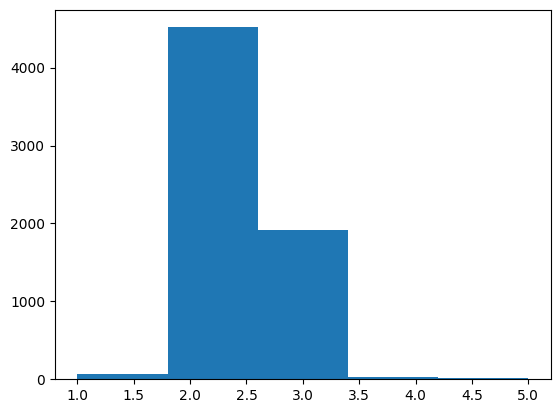

In [ ]:
plt.hist(matches['set_no'] , bins =5)
plt.show()